## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `10_canopy_cover_type_aspect` 
### Calculate canopy cover type (understory vegetation)

Notebook contents 
* Calculate the type of canopy cover on Cle Elum Ridge by determining thresholds for the type of vegetation by height

created by Cassie Lumbrazo\
last updated: June 2024\
run location: locally\
python environment: **raster**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import geopandas as gpd

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# Paths for local machine
ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_all_variables.nc') 

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
ds

<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/339)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

Define Constants

In [5]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

## Okay, new code here... 
let's consider "type" of canopy cover with different classificatons
such as,
* shrubs: 2-5m 
* trees: > 5 m 


In [13]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'shrub_cover', 'canopy_cover'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    shrub_threshold_min = 2
    shrub_threshold_max = 5

    # Determine the shrub grid cells
    shrub_mask = (ds['chmws_rapid'] > 2) & (ds['chmws_rapid'] <= 5)

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_shrub_cells = np.sum(shrub_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    # percentage_shrub_cover = np.clip((total_shrub_cells / total_treatment_cells) * 100, 0, 100) # but that is not solving the problem of % > 100
    percentage_shrub_cover = (total_shrub_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'shrub_cover'] = percentage_shrub_cover.values.astype(int)
    
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 5

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = np.round((total_canopy_cells / total_treatment_cells) * 100)

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover'] = percentage_canopy_cover.values.astype(int)
    
# Print the DataFrame
print(df)

    BAF shrub_cover canopy_cover
0     1          28           36
1     2           4           91
2    17          14           15
3    30           8           26
4    32          12           46
5    38           7           38
6    60           9           43
7    69           7           49
8    80          10           42
9    82           9           56
10   90           5           53
11  140          10           57
12  150           1           98
13  155           6           86


In [15]:
# Now, if anyhting in the dataframe is a float, change it to an integer
df = df.astype(int)

In [16]:
# change the value of df['baf'] 1 to 'leave gap' and 2 to 'leave forest'
df['BAF'] = df['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

# move the leave forest to the last place in the dataframe
df = df.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

df.head()

,BAF,shrub_cover,canopy_cover
0,leave gap,28,36
2,BAF 17,14,15
3,BAF 30,8,26
4,BAF 32,12,46
5,BAF 38,7,38


In [17]:
# Make df into a tidy dataframe with shrub_cover and canopy_cover as strings in new variable with values together for plotting
df_tidy = pd.melt(df, id_vars=['BAF'], value_vars=['shrub_cover', 'canopy_cover'], var_name='cover_type', value_name='cover')
df_tidy.head()

,BAF,cover_type,cover
0,leave gap,shrub_cover,28
1,BAF 17,shrub_cover,14
2,BAF 30,shrub_cover,8
3,BAF 32,shrub_cover,12
4,BAF 38,shrub_cover,7


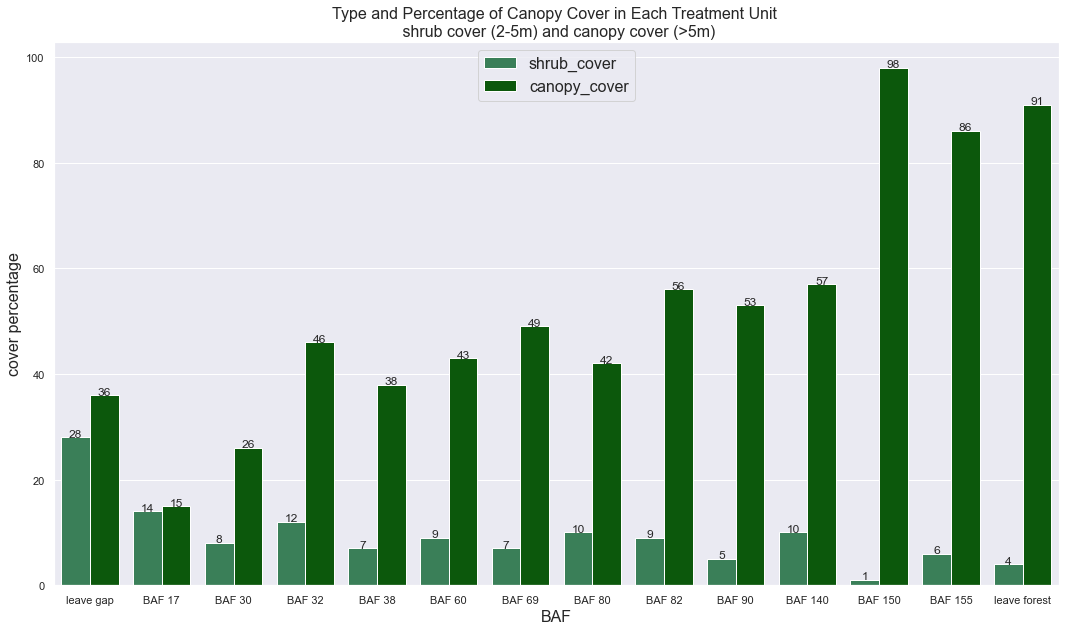

In [18]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['seagreen', 'darkgreen']

# Create a barplot with values
barplot = sns.barplot(data=df_tidy, x='BAF', y='cover', hue='cover_type', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF', fontsize=16)
plt.ylabel('cover percentage', fontsize=16)
plt.title('Type and Percentage of Canopy Cover in Each Treatment Unit \n shrub cover (2-5m) and canopy cover (>5m)', fontsize=16)

plt.legend(loc='upper center', fontsize=16)

plt.show()

### Now, do the same calculations before the treatments

In [23]:
# Initialize the DataFrame
df_pre = pd.DataFrame(columns=['BAF', 'shrub_cover', 'canopy_cover'])
df_pre['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df_pre.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    shrub_threshold_min = 2
    shrub_threshold_max = 5

    # Determine the shrub grid cells
    shrub_mask = (ds['chm_snowoff'] > 2) & (ds['chm_snowoff'] <= 5)

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_shrub_cells = np.sum(shrub_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    # percentage_shrub_cover = np.clip((total_shrub_cells / total_treatment_cells) * 100, 0, 100) # but that is not solving the problem of % > 100
    percentage_shrub_cover = (total_shrub_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'shrub_cover'] = percentage_shrub_cover.values.astype(int)
    
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 5

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = np.round((total_canopy_cells / total_treatment_cells) * 100)

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover'] = percentage_canopy_cover.values.astype(int)
    
# Print the DataFrame
print(df_pre)

    BAF shrub_cover canopy_cover
0     1          40           15
1     2           7           91
2    17          30           10
3    30          11           23
4    32           7           88
5    38           4           91
6    60          10           73
7    69          13           67
8    80          11           87
9    82           8           82
10   90           5           93
11  140          13           62
12  150           0           99
13  155          10           83


In [24]:
# change the type to integer for all columns 
df_pre = df_pre.astype(int)

In [25]:
# change the value of df_pre['baf'] 1 to 'leave gap' and 2 to 'leave forest'
df_pre['BAF'] = df_pre['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

# move the leave forest to the last place in the dataframe
df_pre = df_pre.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

# Make df_pre into a tidy dataframe with shrub_cover and canopy_cover as strings in new variable with values together for plotting
df_pre_tidy = pd.melt(df_pre, id_vars=['BAF'], value_vars=['shrub_cover', 'canopy_cover'], var_name='cover_type', value_name='cover')
df_pre_tidy.head()

,BAF,cover_type,cover
0,leave gap,shrub_cover,40
1,BAF 17,shrub_cover,30
2,BAF 30,shrub_cover,11
3,BAF 32,shrub_cover,7
4,BAF 38,shrub_cover,4


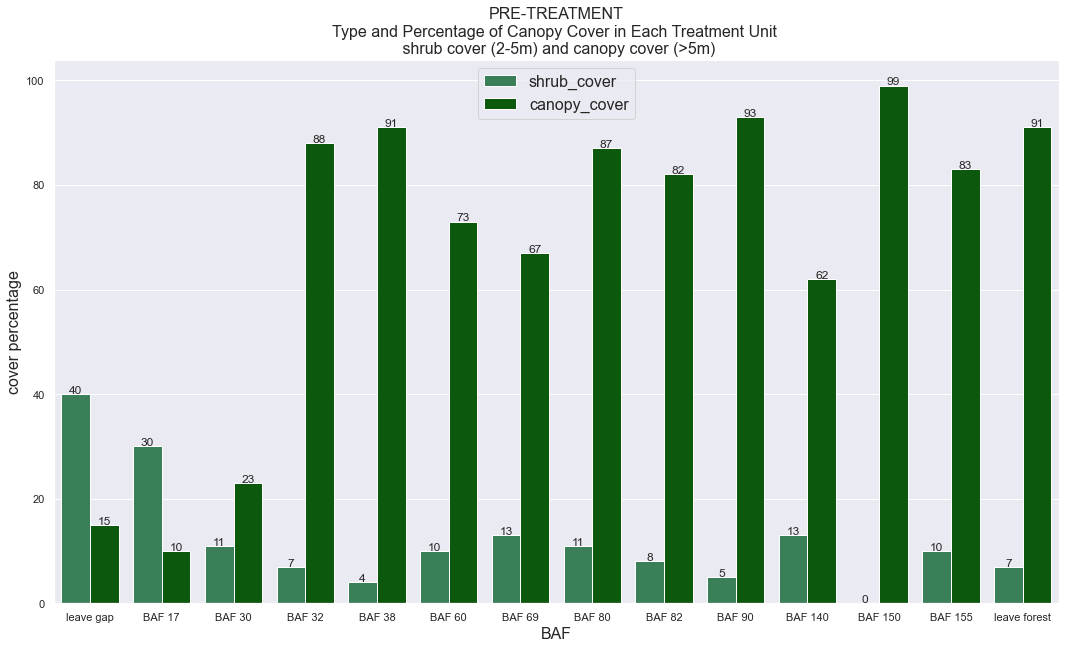

In [26]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['seagreen', 'darkgreen']

# Create a barplot with values
barplot = sns.barplot(data=df_pre_tidy, x='BAF', y='cover', hue='cover_type', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF', fontsize=16)
plt.ylabel('cover percentage', fontsize=16)
plt.title('PRE-TREATMENT\nType and Percentage of Canopy Cover in Each Treatment Unit \n shrub cover (2-5m) and canopy cover (>5m)', fontsize=16)

plt.legend(loc='upper center', fontsize=16)

plt.show()

### Calculate % Canopy Cover On Each Side of the Ridge

In [6]:
# create two versions of the dataframe, one for the north and one for the south
ds_north = ds.where(ds['baf_ridge'] == -1, drop=True)
ds_south = ds.where(ds['baf_ridge'] ==  1, drop=True)

In [7]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'shrub_cover', 'canopy_cover'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    shrub_threshold_min = 2
    shrub_threshold_max = 5

    # Determine the shrub grid cells
    shrub_mask = (ds['chmws_rapid'] > 2) & (ds['chmws_rapid'] <= 5)

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_shrub_cells = np.sum(shrub_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    # percentage_shrub_cover = np.clip((total_shrub_cells / total_treatment_cells) * 100, 0, 100) # but that is not solving the problem of % > 100
    percentage_shrub_cover = (total_shrub_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'shrub_cover'] = percentage_shrub_cover.values.astype(int)
    
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 5

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = np.round((total_canopy_cells / total_treatment_cells) * 100)

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover'] = percentage_canopy_cover.values.astype(int)
    
# Print the DataFrame
print(df)

    BAF shrub_cover canopy_cover
0     1          28           36
1     2           4           91
2    17          14           15
3    30           8           26
4    32          12           46
5    38           7           38
6    60           9           43
7    69           7           49
8    80          10           42
9    82           9           56
10   90           5           53
11  140          10           57
12  150           1           98
13  155           6           86


In [8]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'pre_north_shrub',  'pre_north_canopy',
                                  'pre_south_shrub',  'pre_south_canopy', 
                                  'post_north_shrub', 'post_north_canopy',
                                  'post_south_shrub', 'post_south_canopy',
                                  ])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    shrub_threshold_min = 2
    shrub_threshold_max = 5
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 5
    
    #_______________________________________________________________________________
    # PRE-TREATMENT
    # shrub
    shrub_mask = (ds_north['chmws_ncalm'] > 2) & (ds['chmws_ncalm'] <= 5)
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_shrub_cells = np.sum(shrub_mask * treatment_area)
    total_treatment_cells = np.sum(treatment_area)
    percentage_shrub_cover = (total_shrub_cells / total_treatment_cells) * 100
    df.at[index, 'pre_north_shrub'] = percentage_shrub_cover.values.astype(int)
    
    # canopy
    canopy_mask = ds_north['chmws_ncalm'] > canopy_threshold
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)
    total_treatment_cells = np.sum(treatment_area)
    percentage_canopy_cover = (total_shrub_cells / total_treatment_cells) * 100
    df.at[index, 'pre_north_canopy'] = percentage_canopy_cover.values.astype(int)
    
    #_______________________________________________________________________________
    # now, do the same thing for the south side 
    # shrub
    shrub_mask = (ds_south['chmws_ncalm'] > 2) & (ds['chmws_ncalm'] <= 5)
    treatment_area = ds_south['baf'].where(ds_south['baf'] == BAF)
    total_shrub_cells = np.sum(shrub_mask * treatment_area)
    total_treatment_cells = np.sum(treatment_area)
    percentage_shrub_cover = (total_shrub_cells / total_treatment_cells) * 100
    df.at[index, 'pre_south_shrub'] = percentage_shrub_cover.values.astype(int)
    
    # canopy
    canopy_mask = ds_south['chmws_ncalm'] > canopy_threshold
    treatment_area = ds_south['baf'].where(ds_south['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)
    total_treatment_cells = np.sum(treatment_area)
    percentage_canopy_cover = (total_shrub_cells / total_treatment_cells) * 100
    df.at[index, 'pre_south_canopy'] = percentage_canopy_cover.values.astype(int)

    #_______________________________________________________________________________
    # POST-TREATMENT
    # shrub
    shrub_mask = (ds_north['chmws_rapid'] > 2) & (ds['chmws_rapid'] <= 5)
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_shrub_cells = np.sum(shrub_mask * treatment_area)
    total_treatment_cells = np.sum(treatment_area)
    percentage_shrub_cover = (total_shrub_cells / total_treatment_cells) * 100
    df.at[index, 'post_north_shrub'] = percentage_shrub_cover.values.astype(int)
    
    # canopy
    canopy_mask = ds_north['chmws_rapid'] > canopy_threshold
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)
    total_treatment_cells = np.sum(treatment_area)
    percentage_canopy_cover = (total_shrub_cells / total_treatment_cells) * 100
    df.at[index, 'post_north_canopy'] = percentage_canopy_cover.values.astype(int)
    
    #_______________________________________________________________________________
    # now, do the same thing for the south side 
    # shrub
    shrub_mask = (ds_south['chmws_rapid'] > 2) & (ds['chmws_rapid'] <= 5)
    treatment_area = ds_south['baf'].where(ds_south['baf'] == BAF)
    total_shrub_cells = np.sum(shrub_mask * treatment_area)
    total_treatment_cells = np.sum(treatment_area)
    percentage_shrub_cover = (total_shrub_cells / total_treatment_cells) * 100
    df.at[index, 'post_south_shrub'] = percentage_shrub_cover.values.astype(int)
    
    # canopy
    canopy_mask = ds_south['chmws_rapid'] > canopy_threshold
    treatment_area = ds_south['baf'].where(ds_south['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)
    total_treatment_cells = np.sum(treatment_area)
    percentage_canopy_cover = (total_shrub_cells / total_treatment_cells) * 100
    df.at[index, 'post_south_canopy'] = percentage_canopy_cover.values.astype(int)

# Print the DataFrame
print(df)

    BAF pre_north_shrub pre_north_canopy pre_south_shrub pre_south_canopy  \
0     1              41               41               3                3   
1     2     -2147483648      -2147483648               8                8   
2    17              11               11              14               14   
3    30     -2147483648      -2147483648               8                8   
4    32              10               10     -2147483648      -2147483648   
5    38               7                7     -2147483648      -2147483648   
6    60              12               12              11               11   
7    69               0                0              13               13   
8    80     -2147483648      -2147483648              14               14   
9    82              10               10             100              100   
10   90     -2147483648      -2147483648               9                9   
11  140              12               12              12               12   

In [9]:
# cleaning up a few things
df = df.astype(int)

# drop any values < 0, and make nan 
df = df.where(df > 0)

# change the value of df['baf'] 1 to 'leave gap' and 2 to 'leave forest'
df['BAF'] = df['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

# move the leave forest to the last place in the dataframe
df = df.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

df.head()

,BAF,pre_north_shrub,pre_north_canopy,pre_south_shrub,pre_south_canopy,post_north_shrub,post_north_canopy,post_south_shrub,post_south_canopy
0,leave gap,41.0,41.0,3.0,3.0,33.0,33.0,7.0,7.0
2,BAF 17,11.0,11.0,14.0,14.0,9.0,9.0,15.0,15.0
3,BAF 30,NaN,NaN,8.0,8.0,NaN,NaN,8.0,8.0
4,BAF 32,10.0,10.0,NaN,NaN,12.0,12.0,NaN,NaN
5,BAF 38,7.0,7.0,NaN,NaN,7.0,7.0,NaN,NaN


But we really need this dataframe is a different structure to plot it...

In [11]:
df['pre_north_shrub'] = df['pre_north_shrub'].where(df['BAF'] != 'BAF 17', np.nan)
df['post_north_shrub'] = df['post_north_shrub'].where(df['BAF'] != 'BAF 17', np.nan)
df['pre_north_canopy'] = df['pre_north_canopy'].where(df['BAF'] != 'BAF 17', np.nan)
df['post_north_canopy'] = df['post_north_canopy'].where(df['BAF'] != 'BAF 17', np.nan)
df

,BAF,pre_north_shrub,pre_north_canopy,pre_south_shrub,pre_south_canopy,post_north_shrub,post_north_canopy,post_south_shrub,post_south_canopy
0,leave gap,41.0,41.0,3.0,3.0,33.0,33.0,7.0,7.0
2,BAF 17,NaN,NaN,14.0,14.0,NaN,NaN,15.0,15.0
3,BAF 30,NaN,NaN,8.0,8.0,NaN,NaN,8.0,8.0
4,BAF 32,10.0,10.0,NaN,NaN,12.0,12.0,NaN,NaN
5,BAF 38,7.0,7.0,NaN,NaN,7.0,7.0,NaN,NaN
6,BAF 60,12.0,12.0,11.0,11.0,9.0,9.0,5.0,5.0
7,BAF 69,NaN,NaN,13.0,13.0,NaN,NaN,7.0,7.0
8,BAF 80,NaN,NaN,14.0,14.0,NaN,NaN,10.0,10.0
9,BAF 82,10.0,10.0,100.0,100.0,9.0,9.0,NaN,NaN
10,BAF 90,NaN,NaN,9.0,9.0,NaN,NaN,5.0,5.0


In [12]:
# fill the pre_north column and "leave forest" row with 98 
df['pre_north_shrub'] = df['pre_north_shrub'].where(df['BAF'] != 'leave forest', 98) # filling with the BAF 150 values
df['post_north_shrub'] = df['post_north_shrub'].where(df['BAF'] != 'leave forest', 99) # filling with the BAF 150 values

df['pre_north_canopy'] = df['pre_north_canopy'].where(df['BAF'] != 'leave forest', 98) # filling with the BAF 150 values
df['post_north_canopy'] = df['post_north_canopy'].where(df['BAF'] != 'leave forest', 99) # filling with the BAF 150 values

# now, drop the row BAF 150 since it's the leave forest and we want it named that for now 
df = df.drop(df[df['BAF'] == 'BAF 150'].index)
df

,BAF,pre_north_shrub,pre_north_canopy,pre_south_shrub,pre_south_canopy,post_north_shrub,post_north_canopy,post_south_shrub,post_south_canopy
0,leave gap,41.0,41.0,3.0,3.0,33.0,33.0,7.0,7.0
2,BAF 17,NaN,NaN,14.0,14.0,NaN,NaN,15.0,15.0
3,BAF 30,NaN,NaN,8.0,8.0,NaN,NaN,8.0,8.0
4,BAF 32,10.0,10.0,NaN,NaN,12.0,12.0,NaN,NaN
5,BAF 38,7.0,7.0,NaN,NaN,7.0,7.0,NaN,NaN
6,BAF 60,12.0,12.0,11.0,11.0,9.0,9.0,5.0,5.0
7,BAF 69,NaN,NaN,13.0,13.0,NaN,NaN,7.0,7.0
8,BAF 80,NaN,NaN,14.0,14.0,NaN,NaN,10.0,10.0
9,BAF 82,10.0,10.0,100.0,100.0,9.0,9.0,NaN,NaN
10,BAF 90,NaN,NaN,9.0,9.0,NaN,NaN,5.0,5.0


In [13]:
# make df a tidy dataframe for box plot plotting 
df_tidy = df.melt(id_vars='BAF', var_name='treatment', value_name='canopy_cover')
df_tidy

,BAF,treatment,canopy_cover
0,leave gap,pre_north_shrub,41.0
1,BAF 17,pre_north_shrub,NaN
2,BAF 30,pre_north_shrub,NaN
3,BAF 32,pre_north_shrub,10.0
4,BAF 38,pre_north_shrub,7.0
...,...,...,...
99,BAF 82,post_south_canopy,NaN
100,BAF 90,post_south_canopy,5.0
101,BAF 140,post_south_canopy,11.0
102,BAF 155,post_south_canopy,6.0


In [18]:
df_tidy['aspect'] = df_tidy['treatment'].where(df_tidy['treatment'].str.contains('north'), 'south')
df_tidy['aspect'] = df_tidy['treatment'].where(df_tidy['treatment'].str.contains('south'), 'north')
df_tidy['type']   = df_tidy['treatment'].where(df_tidy['treatment'].str.contains('shrub'), 'canopy')
df_tidy['type']   = df_tidy['treatment'].where(df_tidy['treatment'].str.contains('canopy'), 'shrub')

df_tidy

,BAF,treatment,canopy_cover,aspect,type
0,leave gap,pre_north_shrub,41.0,north,shrub
1,BAF 17,pre_north_shrub,NaN,north,shrub
2,BAF 30,pre_north_shrub,NaN,north,shrub
3,BAF 32,pre_north_shrub,10.0,north,shrub
4,BAF 38,pre_north_shrub,7.0,north,shrub
...,...,...,...,...,...
99,BAF 82,post_south_canopy,NaN,post_south_canopy,post_south_canopy
100,BAF 90,post_south_canopy,5.0,post_south_canopy,post_south_canopy
101,BAF 140,post_south_canopy,11.0,post_south_canopy,post_south_canopy
102,BAF 155,post_south_canopy,6.0,post_south_canopy,post_south_canopy


# STUCK HERE---------------COME BACK IF YOU WANT...

In [14]:
# # # can you make this dataframe so that the order of 'treatment' is pre_north, post_north, pre_south, post_south 
# df_tidy = df_tidy.reindex([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,           #pre_north
#                            26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, #post_north
#                            13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, #pre_south
#                            39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,  #post_south
#                            ])  
# df_tidy

NameError: name 'figure_path' is not defined

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

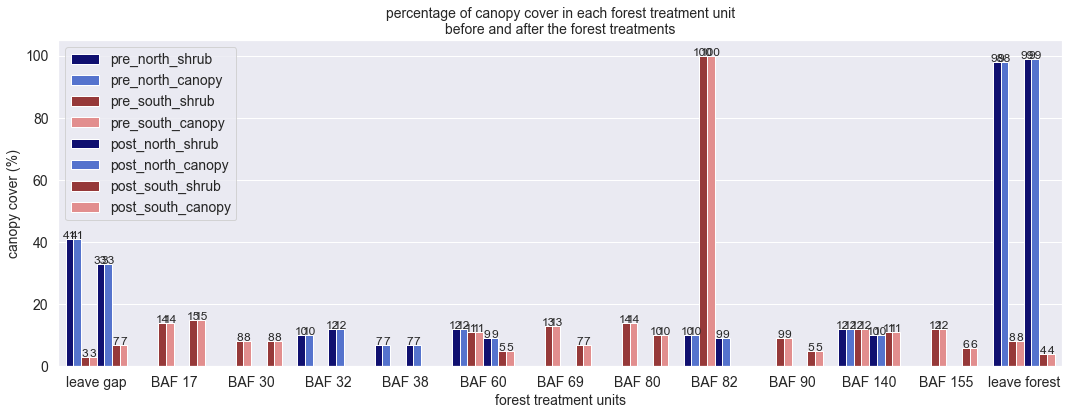

In [15]:
fig = plt.figure(figsize=(18, 6))
# palette = [colorpre, colorpos]
palette = ['navy', 'royalblue', 'brown', 'lightcoral']

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df_tidy, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('canopy cover (%)', fontsize=fontsize_num)
plt.title('percentage of canopy cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper left', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# # change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
# plt.gca().yaxis.set_label_position("right")
# plt.gca().yaxis.tick_right()

# export the figure with high resolution
figure_name = 'canopy_cover_side_of_ridge_one.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

In [ ]:
df_tidy_north = df_tidy.where((df_tidy['treatment'] == 'pre_north') | (df_tidy['treatment'] == 'post_north')).dropna(how='all')
df_tidy_south = df_tidy.where((df_tidy['treatment'] == 'pre_south') | (df_tidy['treatment'] == 'post_south')).dropna(how='all')
#df_tidy_south

In [ ]:
# rename the pre_north to pre-treatment and post_north to post-treatment
df_tidy_north['treatment'] = df_tidy_north['treatment'].replace({'pre_north': 'pre-treatment', 'post_north': 'post-treatment'})
df_tidy_south['treatment'] = df_tidy_south['treatment'].replace({'pre_south': 'pre-treatment', 'post_south': 'post-treatment'})
df_tidy_south.head()

,BAF,treatment,canopy_cover
13,leave gap,pre-treatment,9.0
14,BAF 17,pre-treatment,13.0
15,BAF 30,pre-treatment,20.0
16,BAF 32,pre-treatment,NaN
17,BAF 38,pre-treatment,NaN


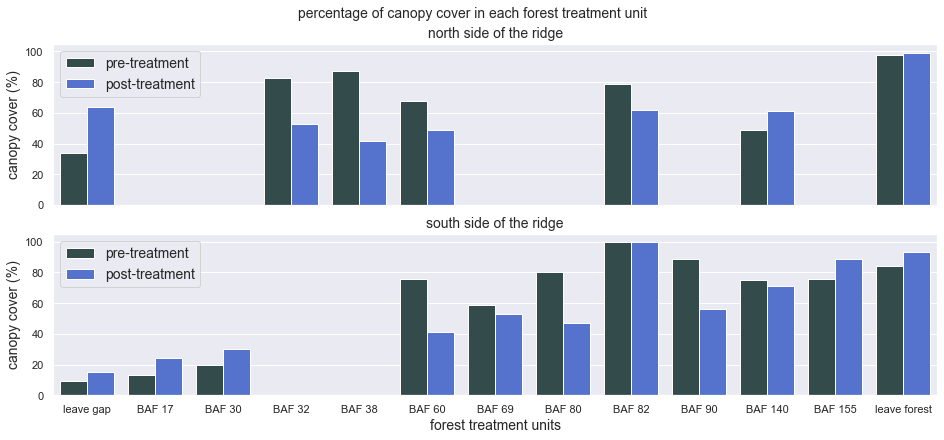

In [ ]:

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(13,6), constrained_layout = True)
palette = [colorpre, colorpos]

plt.suptitle('percentage of canopy cover in each forest treatment unit', fontsize=fontsize_num)
fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data= df_tidy_north, ax=axes[0], x='BAF', y='canopy_cover', hue='treatment', palette=palette)    
barplot = sns.barplot(data= df_tidy_south, ax=axes[1], x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# # Add values on top of each bar
# for p in barplot.patches:
#     height = p.get_height()
#     plt.text(p.get_x()+p.get_width()/2., 
#              height + 0.1, 
#              '{:1.0f}'.format(height), 
#              ha="center")

# Customize the layout
axes[0].set_xlabel('')
axes[1].set_xlabel('forest treatment units', fontsize=fontsize_num)
axes[0].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[1].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[0].legend(loc='upper left', fontsize=fontsize_num)
axes[1].legend(loc='upper left', fontsize=fontsize_num)

axes[0].set_title('north side of the ridge', fontsize=fontsize_num)
axes[1].set_title('south side of the ridge', fontsize=fontsize_num)

# increase the size of the xtick labels
# axes[0].set_xticks(fontsize=fontsize_num)

# # change the ylabel to be on the right side of the figure instead 
# axes[0].set_yticks(fontsize=fontsize_num)
# plt.gca().yaxis.set_label_position("right")
# plt.gca().yaxis.tick_right()

# export the figure with high resolution
figure_name = 'canopy_cover_side_of_ridge_two.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

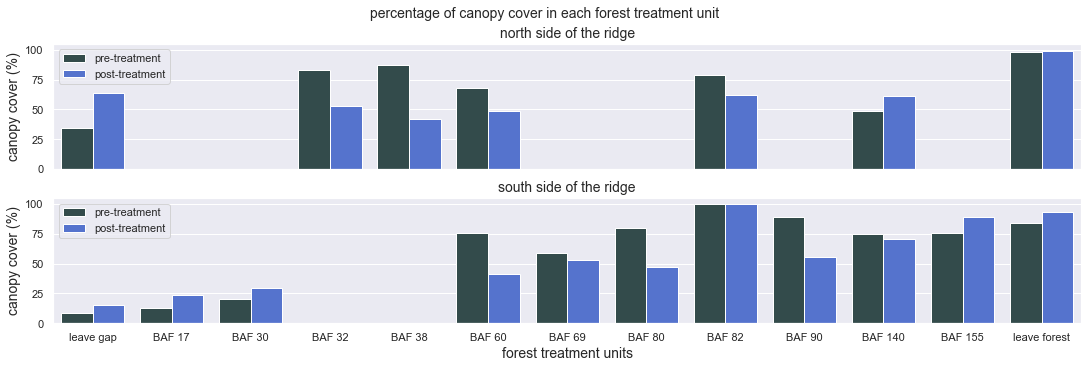

In [ ]:

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,5), constrained_layout = True)
palette = [colorpre, colorpos]

plt.suptitle('percentage of canopy cover in each forest treatment unit', fontsize=fontsize_num)
fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data= df_tidy_north, ax=axes[0], x='BAF', y='canopy_cover', hue='treatment', palette=palette)    
barplot = sns.barplot(data= df_tidy_south, ax=axes[1], x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# # Add values on top of each bar
# for p in barplot.patches:
#     height = p.get_height()
#     plt.text(p.get_x()+p.get_width()/2., 
#              height + 0.1, 
#              '{:1.0f}'.format(height), 
#              ha="center")

# Customize the layout
axes[0].set_xlabel('')
axes[1].set_xlabel('forest treatment units', fontsize=fontsize_num)
axes[0].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[1].set_ylabel('canopy cover (%)', fontsize=fontsize_num)
axes[0].legend()
axes[1].legend()

axes[0].set_title('north side of the ridge', fontsize=fontsize_num)
axes[1].set_title('south side of the ridge', fontsize=fontsize_num)

# increase the size of the xtick labels
# axes[0].set_xticks(fontsize=fontsize_num)

# export the figure with high resolution
figure_name = 'canopy_cover_side_of_ridge_two_small.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()